# Assignment A2 [40 marks]



The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---

# Question 1: Quadrature [16 marks]

In the course, we have seen Newton-Cotes interpolatory quadrature rules, which have the particular property that they use equally-spaced nodes. Other types of quadrature rules also exist.

In this question, we will consider quadrature rules with $N$ nodes, where the nodes $x_k$ are defined as the Chebyshev nodes, i.e.

$$
x_k = \cos\left(\frac{(2k-1)\pi}{2N}\right), \quad
k=1, \dots, N.
$$

**1.1** Write a function `cheb_nodes()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the $N$ Chebyshev nodes, as defined above.

**[2 marks]**

In [1]:
# Import numpy for use of np.arrange function
import numpy as np
    
# Define the cheb_nodes function with 1 a strictly positive integer argument N    
def cheb_nodes(N):
    
    # Create an array of k that contains elements/numbers starts from 1 to N. {eg. when N=2, k=[1,2]}
    k = np.arange(1,N+1)
    
    return np.cos((2*k-1) / (2*N) * np.pi)

# Test the function when N=3
print(cheb_nodes(3))

[ 8.66025404e-01  6.12323400e-17 -8.66025404e-01]


**1.2** Write a function `cheb_weights()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the **weights** $w_k$ associated with the interpolatory quadrature rule whose nodes are the $x_k$ as defined above.

For testing: the weights for $N = 3$ are $\left\{\frac{4}{9}, \frac{10}{9}, \frac{4}{9}\right\}$.

**[6 marks]**

In [2]:
# Using matrix thinking

# import numpy as np and for use of np.linalg.solve to solve matrix equation
def cheb_weights(N):
    
    # Set nodes for use of the following matrices a & b 
    x = cheb_nodes(N)
    
    # Create a matrix p with the elements of combination of x^0 ~ x^n-1
    p = np.array([x**i for i in range(N)])
    
    # Create the matrix I represents the right-hand side of the matrix equation(the integral from 1 to -1 of the function x^(N))
    I = np.array([(1/(i+1) - (1/(1+i)*(-1)**(i+1))) for i in range(N)])
    
    # Use function of linalg.solve to solve the matrix equation, and the results are the weights
    w = np.linalg.solve(p,I)
    
    return w

# Test of the function when N=3
print('cheb_weights =',cheb_weights(3))
print('4/9,10/9,4/9 =',[round(4/9,8),round(10/9,8),round(4/9,8)])   

cheb_weights = [0.44444444 1.11111111 0.44444444]
4/9,10/9,4/9 = [0.44444444, 1.11111111, 0.44444444]


**1.3** Consider the following integral, with a known closed form:

$$
I = \int_{-\pi/4}^{\pi/4}  \frac{1}{\cos^3(x)} \ dx =  \sqrt{2} + 2 \text{ arctanh}\left(\tan\left(\frac{\pi}{8}\right)\right).
$$

Test your quadrature rule by using it to approximate $I$ and compare the computed result to the exact value of the integral.

(For $N = 3$, you should obtain an error of approximately $0.0627$.)

**[3 marks]**

In [3]:
import numpy as np

# Define the function inside the integral
def f(x):
    return 1/(np.cos(x)**3)

# Define the interval, number of nodes
a,b = -np.pi/4, np.pi/4
N=3

# Create the quadrature function to approximate the integral
def quadrature(f, a, b, N):
    
        # Define the shifted and scaled nodes
        yk = (b-a)* (cheb_nodes(N) + 1)/2  + a
    
        # Compute the weighted sum
        I_approx = (b-a) * np.sum(cheb_weights(N) * f(yk))/2
        # or we can run this: I_approx = (b-a)* np.dot(cheb_weights(N),f(yk))/2  
        
        return I_approx




I_exact  = np.sqrt(2) + 2* np.arctanh(np.tan(np.pi/8))

I_error = abs(quadrature(f, a, b, N) - I_exact)

print('Approximation of I = ',quadrature(f,a,b, N))
print('Exact value of I =', I_exact)
print('Difference between exact integral and approximation = ',I_error)

Approximation of I =  2.3582529398961056
Exact value of I = 2.295587149392638
Difference between exact integral and approximation =  0.06266579050346754


**1.4** Investigate the accuracy of the quadrature rules you obtain using your functions `cheb_nodes()` and `cheb_weights()` for a range of different values of $N$.

Summarise and explain your results in a discussion of no more than 250 words.

**[5 marks]**

N, error
2 0.26480763916290107
3 0.06266579050346754
4 0.022143678939417377
5 0.0035117676763718464
6 0.0011604042516362156
7 0.00017593702236595732
8 6.683367619375602e-05
9 1.0073354550055313e-05
10 4.227866781114642e-06
11 6.319884575667345e-07
12 2.807154846351523e-07
13 4.155316046805524e-08
14 1.910781044500709e-08
15 2.802710064031544e-09
16 1.3194147996387073e-09
17 1.9199353218368742e-10
18 9.194245365051756e-11
19 1.3286705069504023e-11
20 6.445066702553959e-12
21 9.263700917472306e-13
22 4.53859172466764e-13
23 6.439293542825908e-14
24 3.197442310920451e-14
25 4.440892098500626e-15
26 2.220446049250313e-15
27 4.440892098500626e-16
28 1.3322676295501878e-15
29 1.3322676295501878e-15
30 4.440892098500626e-16
31 4.440892098500626e-16
32 0.0
33 4.440892098500626e-16
34 0.0
35 4.440892098500626e-16
36 4.440892098500626e-16
37 4.440892098500626e-16
38 4.440892098500626e-16
39 4.440892098500626e-16
40 4.440892098500626e-16
41 0.0
42 8.881784197001252e-16
43 0.0
44 8.881784197001252

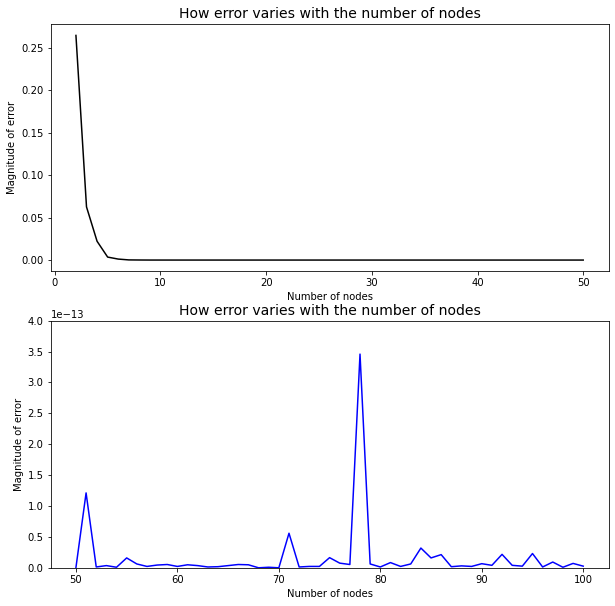

In [6]:
# import matplotlib.pyplot for use of plotting the graph
%matplotlib inline
import matplotlib.pyplot as plt

# Set Ns as an array with number from(2,50)
Ns = np.array(range(2, 51))
# Set Ns as an array with number from(50,100)
Ms = np.array(range(50,101))

# Set I as an array with approximations from N=2 to N=50 of the integral
I = np.array([quadrature(f, a, b, N)for N in Ns])
# Set I_2 as an array with approximations from N=50 to N=100 of the integral
I_2 = np.array([quadrature(f, a, b, N)for N in Ms])

# Define errors between I and the exact integral
errors_1 = np.abs(I-I_exact)

# Define errors between I_2 and the exact integral
errors_2 = np.abs(I_2-I_exact)

# print the title of the following two columns' values
print('N, error')

# Presents the number of nodes and errors in two columns from Ns,errors_1 & Ms,errors_2
for N,e in zip(Ns, errors_1):
    print(N,e)
    
for N,e in zip(Ms, errors_2):
    print(N,e)
    
# Plot subplots to create 2 graphs in two rows respectively
fig, ax = plt.subplots(2,1,figsize=(10, 10))

ax[0].plot(Ns,errors_1,'k-')
ax[0].set_xlabel('Number of nodes', fontsize=10)
ax[0].set_ylabel('Magnitude of error', fontsize=10)
ax[0].set_title('How error varies with the number of nodes', fontsize=14)
ax[1].plot(Ms,errors_2,'b-')
ax[1].set_ylim(0,4e-13)
ax[1].set_xlabel('Number of nodes', fontsize=10)
ax[1].set_ylabel('Magnitude of error', fontsize=10)
ax[1].set_title('How error varies with the number of nodes', fontsize=14)

plt.show()

***📝 Discussion for question 1.4***

According to the first grapgh, we can see that the magnitude of error decreases shaply in the N-interval 2 to 5. Then its trend shows convergence to us. At first, it did make me quite believe that the the error will converge until the end, however, when I increase the scale of the grapgh and soar the number of nodes into the function, the plot shows obvious fluctuations in the interval between 50 and 100. This phenomenon is called 'Runge's phenomenon', which is is the problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. The reasons are that the magnitude of the n-th order derivatives of this particular function grows quickly when n increases and the equidistance between points leads to a Lebesgue constant that increases quickly when n increases.The phenomenon is graphically obvious because both properties combine to increase the magnitude of the oscillations.The phenomenon is graphically obvious because both properties combine to increase the magnitude of the oscillations.


---
# Question 2: Numerical differentiation [10 marks]


Consider a finite difference approximation 

$$
F' \left( x \right) \approx D \left( x \right) = \frac{1}{\Delta x} \left[ -\frac{1}{8} F \left( x - 2\Delta x \right) -\frac{3}{4} F \left( x \right) + F \left( x + \Delta x \right) - \frac{1}{8} F \left( x + 2 \Delta x \right) \right].
$$

By considering the derivative of the function $F \left( x \right) = \sin x$ at $x = 1$, perform numerical experiments to investigate the accuracy of this approximation. Your code should generate appropriate output and/or figures to illustrate the results.

Confirm your results analytically. (You can either use the Markdown cell below, or submit a PDF of your handwriting if you prefer.)

**[10 marks]**

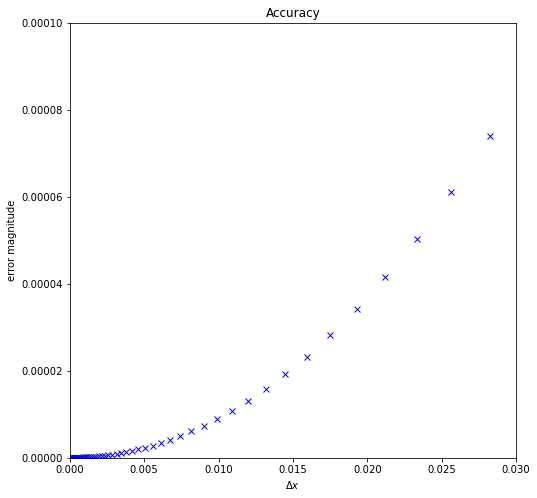

the order should be greater or equal than 2, since the graph does not show a straight line


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the given function
def F(x):
    return np.sin(x)

# Define the derivative of the given function
def F_derivative(x):
    return np.cos(x)

# Set value of x
x0 = 1

# Compute delta x in an array with 50 samll values
dx = np.ones(100)/20


# Create a loop for i from i=0 to i=99
for i in range(100):
    
    # When i is not equal to 0, the next delta x should be smaller than the previous one
    if i !=0:
        
        dx[i]=dx[i-1]/1.1

# Define finite difference approximation
def D(x):
    
    # Compute the given right-hand side approximation
    F_approximation = 1/dx * ((-1/8) * F(x- 2 * dx) - (3/4) * F(x) + F(x + dx) - 1/8 * F(x + 2 * dx))
    
    return F_approximation


# Compute the error between the apprpoximation and the exact.
F_error = np.abs(D(x0) - F_derivative(x0))

# Plot one figure
fig, ax = plt.subplots(1,1,figsize=(8,8))

# Set limits for dx and F_error
ax.set_xlim(0,0.03)
ax.set_ylim(0,0.00010)

# Plot error against delta x
ax.plot(dx, F_error, "bx")

# Label the plot
ax.set(xlabel="$\\Delta x$", ylabel="error magnitude", title="Accuracy")



plt.show()


print('the order should be greater or equal than 2, since the graph does not show a straight line')

 

***📝 Question 2***

Test if the order of accuracy is 2:

$$
\begin{align}
D(x)\ is\ kth\ order\ accurate\ when,\ for\ small\ enough\ \Delta x,\ D(x) - F^m(x)\ = O(Δx^k)
\end{align}
$$

$$
\begin{align}
F(x0-2\Delta x) &= F(x0)-2\Delta xF'(x0)+2\Delta x^2F''(x0)-\frac{4}{3}\Delta x^3F'''(x0)+ O(Δx^4) \\
F(x0+2\Delta x) &= F(x0)+2\Delta xF'(x0)+2\Delta x^2F''(x0)+\frac{4}{3}\Delta x^3F'''(x0)+ O(Δx^4) \\
F(x0+\Delta x) &= F(x0)+\Delta xF'(x0)+\frac{1}{2}\Delta x^2F''(x0)+\frac{1}{6}\Delta x^3F'''(x0)+ O(Δx^4) \\
F(x0) &= F(x0) \\
\end{align}
$$

Adding these 4 terms:
$$
D(x0)=F'(x0)+\frac{1}{6}\Delta x^2F'''(x0) + O(Δx^3) \\
since\ \frac{1}{6}\Delta x^2F'''(x0)\  dominates\  the\  error,  order\ of\ accuracy\ is\ indeed\ 2.\\
$$

so the error is
$$
|F'(x0)-D(x0)|\le \frac{\Delta x^2}{6} N, \quad N\ge \max_{|x-x0|\le \Delta x}|F'''(x)|
$$

---
# Question 3: Root finding [14 marks]

Consider the function

$$
  F \left( x \right) = \ln x - x + 4.
$$

**3.1** Plot the function over the interval $x \in (0, 10]$.

**[2 marks]**

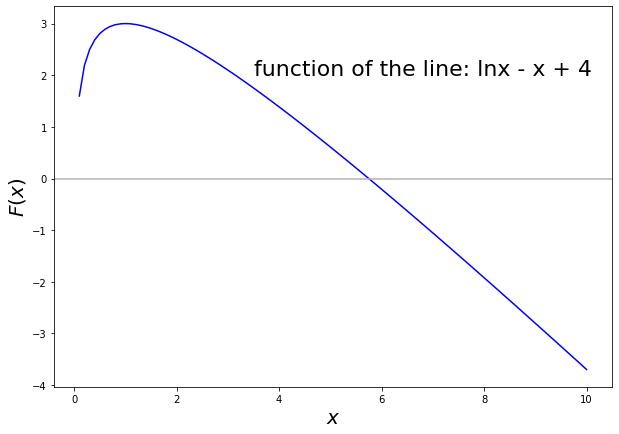

In [116]:
# Import numpy and pyplot for use of linspace and plotting the graph
import numpy as np
import matplotlib.pyplot as plt

# define the known function needed to be plotted
def F(x):
    return np.log(x) - x + 4

# Create an x-axis with 100 points
x = np.linspace(0.1,10,100)

# Draw a single figure with controlled size
fig, ax = plt.subplots(1, 1, figsize=(10, 4))


# Create the plot and display it
handle,= ax.plot(x,F(x),'b-')

# Create y-axis and x-axis labels for the plot
ax.set_ylabel(r'$F(x)$', fontsize=20)
ax.set_xlabel(r'$x$',fontsize=20)
fig.set_size_inches(10,7)
ax.text(3.5, 2, 'function of the line: lnx - x + 4', fontsize = 22)

# Plot the line F(x) = 0
ax.axhline(0.0, color=[0.7, 0.7, 0.7])

# Plot the graph
plt.show()

**3.2** Find the root of $F$ in the interval $[4, 8]$, using 2 different methods: a bracketing method of your choice, and Newton's method.

**[4 marks]**

In [4]:
# Bisection method

# Define F(x)
def F(x):
    return np.log(x)-x+4

# Define derivative of F(x)
def F_der(x):
    return 1/x-1

# Set Tolerence value
tolerence_value = 1e-14
tol = tolerence_value

# Set value of a & b
a, b = 4, 8

# if b-a is greater than the tolerence value, x equals mid point of b & a
while b-a > tol:
    x = (a+b)/2
    fx = F(x)
    
    # if F(a) & F(x) have same sign, the root is in [x,b]
    if F(a)*F(x) >= 0:
        a = x
    
    else:
        # if F(b) & F(x) have same sign, root is in [a,x]
        assert F(b)*F(x) >= 0
        b = x

print('Root finding use bisection method =', (a+b)/2)


# Newton's method
def Fp(x):
    return 1/x - 1

def G(x):
    return x - F(x)/Fp(x)

for x0 in [4,8]:
    
    # Initial guess
    x = x0
    
    # Loop until convergence
    while True:
        x_new = G(x)
        
        # Convergence achieved
        if abs(x_new - x) < tol:
            
            break
        
        # Update for next iteration
        x = x_new
    
# Display the value of the root
print('Root finding using Newton method = ', x_new)


    
    

Root finding use bisection method = 5.7490313860127
Root finding using Newton method =  5.749031386012701


**3.3** Consider a third method to find this root, defined as the fixed-point iteration

$$
  x_n = G \left( x_{n - 1} \right) \textrm{ for } n = 1, 2, \ldots,
$$

with iteration function

$$
  G \left( x \right) = \alpha \left( \ln x - x + 4 \right) + x,
$$

where $\alpha$ is a real parameter to be specified.

Using an initial guess $x_0 = 5$, use this fixed-point iteration to seek the root, considering different values of $\alpha \in \left[ 1, 5 \right]$.

Discuss and explain the convergence properties of this fixed-point iteration. Your code should generate appropriate output and/or figures to illustrate the results and to support your discussion.

You can use the Markdown cell below for discussion, or submit a PDF of your handwriting if you prefer.

**[8 marks]**

x = 5
x = 5.6094379124341005
x = 5.724450520652851
x = 5.744746565908765
x = 5.748285796473674
x = 5.748901688009552
x = 5.749008825783429
x = 5.749027461825822


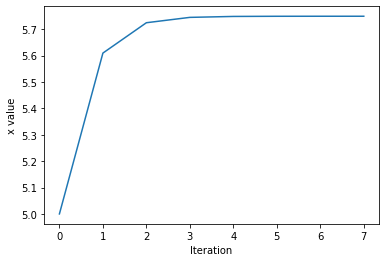

x = 5
x = 6.218875824868201
x = 5.436302484861226
x = 5.949895794120428
x = 5.616851617501508
x = 5.834690975538761
x = 5.692951632152649
x = 5.785506075671129
x = 5.725205599306062
x = 5.764551323369951
x = 5.738903322635601
x = 5.755632943970672
x = 5.744725091434234
x = 5.751839025286121
x = 5.74720024303175
x = 5.7502254009135925
x = 5.748252707486085
x = 5.749539155854633
x = 5.748700253724252
x = 5.749247319130074
x = 5.748890571310158
x = 5.749123212836192
x = 5.748971504080089
x = 5.749070435829273
x = 5.749005920983317
x = 5.74904799212862
x = 5.7490205569019235
x = 5.749038447838089
x = 5.749026780886739


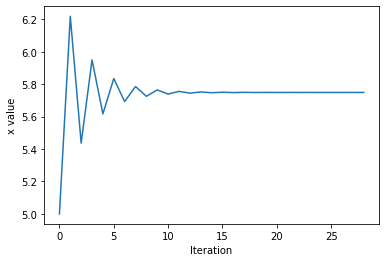

x = 5
x = 6.8283137373023015
x = 4.106605782940056
x = 8.024578965353644
x = 2.198369676082402
x = 9.966408735795557
x = -1.0351565354649992
CAN'T CONVEGE!!!


/var/folders/70/q6366zfd2l99m4dbknv7067c0000gn/T/ipykernel_50817/936426769.py:10: RuntimeWarning: invalid value encountered in log
  return ALPHA * (np.log(x) - x + 4) + x


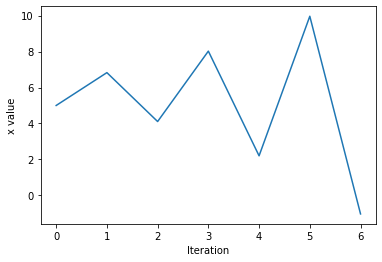

x = 5
x = 7.437751649736402
x = 1.713019473022893
x = 13.013971929197586
x = -12.777821611189305
CAN'T CONVEGE!!!


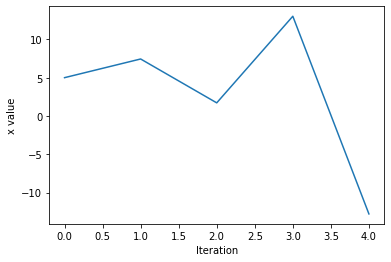

x = 5
x = 8.047189562170502
x = -1.7621437098759536
CAN'T CONVEGE!!!


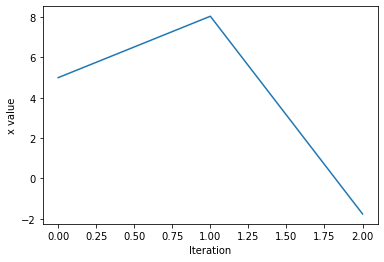

In [8]:
from cmath import isnan
import numpy as np
import matplotlib.pyplot as plt

ALPHA = 1

# function to be solved
def G(x):
    
    return ALPHA * (np.log(x) - x + 4) + x

# try alpha from 1 to 5
for ALPHA in range(1,6):
    x = 5
    x_prev = 5
    xs = []
    it = 0
    # start iteration
    while it<1e4 :
        if isnan(x): # x out of valid range
            print("CAN'T CONVEGE!!!")
            break
        x_prev = x
        it += 1
        print("x =", x)
        xs.append(x)
        x = G(x)
        if abs(x - x_prev) < 1e-5: # if converge
            break
    # plot x value
    plt.plot([i for i in range(len(xs))], xs)
    plt.xlabel('Iteration')
    plt.ylabel('x value')
    plt.show()











***📝 Discussion for question 3.3***

As we see in the above graphs, when alpha = 1,2 it converges and approach to the approximation of Newton and bisection method. However, when alpha = 3,4,5, it will not finally converge but diverge, because step size is too large and x goes out of the interval of convergence and even out of the valid range.